In [1]:
import lane_detection
import lane_following
import cv2
import numpy as np
import matplotlib.pyplot as plt

[[4.3561643835616435, 797.2295597484276, 724, 761, 797, 1079], [1.9606741573033708, 961.5300859598854, 782, 728, 960, 1077]]
2.7042068200923475
[0, 0, 480.00208592384337, 0, 879.3798228541565, 1080]


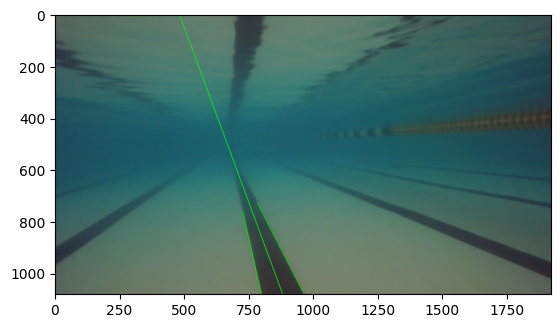

left
[[-9.473684210526315, 726.1, 728, 1062, 804, 342], [5.131147540983607, 1006.1948881789137, 945, 766, 1006, 1079]]
22.388237631631235
[0, 0, 817.9078274760384, 0, 866.1474440894569, 1080]


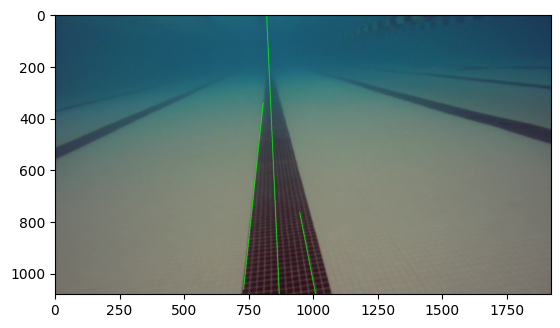

forward
[[-0.383448275862069, -385.5791366906475, 3, 931, 728, 653], [-1.8781512605042017, 797.4675615212528, 798, 1079, 1036, 632]]
-0.6368712506950869
[0, 0, 1901.7343722337566, 0, 205.94421241530267, 1080]


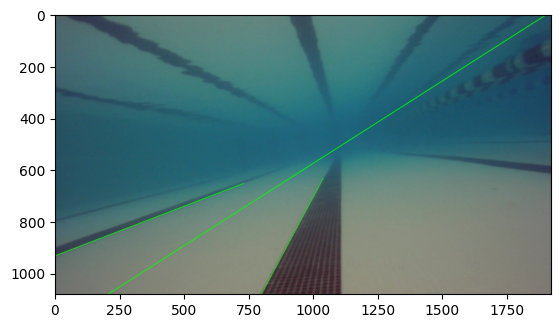

right
[[-2.0463917525773194, 567.5793450881612, 571, 1073, 765, 676], [6.349206349206349, 950.695, 871, 574, 934, 974]]
-6.039285782197798
[0, 0, 937.9662657430731, 0, 759.1371725440806, 1080]


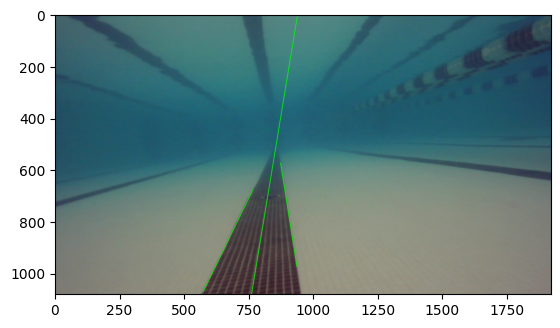

forward
[[2.0488721804511276, 713.6550458715597, 188, 3, 454, 548], [1.3284671532846715, 774.5274725274726, 82, 160, 356, 524]]
1.6118364926021922
[0, 0, 74.04810968847667, 0, 744.0912591995161, 1080]


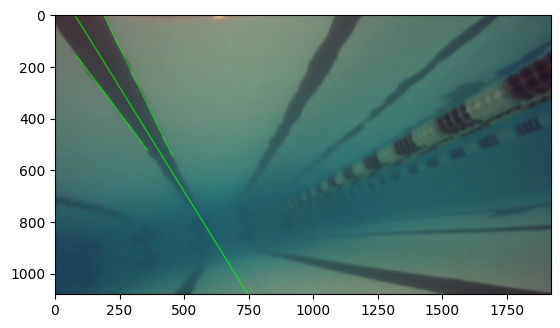

left
[[1.0, 836.0, 382, 626, 835, 1079], [0.7262996941896025, 1152.3768421052632, 497, 604, 1151, 1079]]
0.841452612931798
[0, 0, -289.3063157894738, 0, 994.1884210526316, 1080]


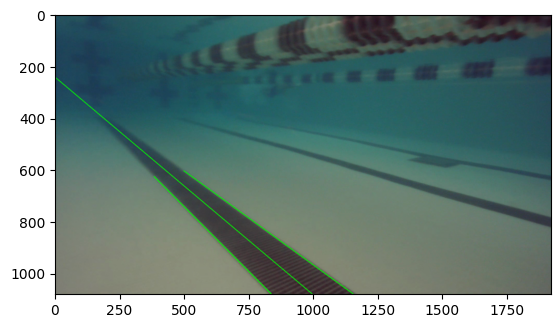

left


KeyboardInterrupt: 

In [2]:
vcap = cv2.VideoCapture("AUV_Vid.mkv")

frequency = 100
count = 0

while True:
    ret, img = vcap.read()

    if not ret:
        break


    if count % frequency == 0:
        c = img.shape[0]/2
        lines = lane_detection.detect_lines(img, threshold1=30,threshold2=40, apertureSize=3,maxLineGap = 200, minLineLength=300)
        lanes = lane_detection.detect_lanes(lines)
        drawing = lane_detection.draw_lanes(img, lanes)
        #newimg = lane_detection.draw_lines(img, lines)


        print(lanes)
        center = lane_following.get_lane_center(lanes)
        cen = lane_following.get_center_line(center[0], center[1],img.shape[0])
        print(cen)
        plt.imshow(cv2.cvtColor(lane_following.draw_center(img, cen), cv2.COLOR_BGR2RGB))
        plt.show()
        
        print(lane_following.recommend_direction(center[0], center[1], c, lanes))

    count += 1